<a href="https://colab.research.google.com/github/RAVANv2/News_Scraping/blob/codeupdate/Relevancy/KeyWordExtracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive' , force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

# Keyword Extraction 
The objective is to extract keywords from article for the purpose of finding relevancy score

## Data

In [0]:
import pandas as pd
from tqdm import tqdm

In [0]:
keywords = ['embezzlement',
 'assets',
 'crime',
 'fraud',
 'misconduct',
 'tax_evasion',
 'money_laundering',
 'identity_theft',
 'corruption',
 'sanctions',
 'cyber',
 'terrorism',
 'bribery']

### from our database

In [0]:
import requests
import json
import pandas as pd

In [0]:
host = 'https://search-solytics-tzxvnvrvkscgklaedz5lr3iqxu.ap-south-1.es.amazonaws.com'

In [0]:
def elasticsearch_curl(uri=host, json_body='', verb='get'):
    # pass header option for content type if request has a
    headers = {
        'Content-Type': 'application/json',
    }

    try:
        # make HTTP verb parameter case-insensitive by converting to lower()
        if verb.lower() == "get":
            resp = requests.get(uri, headers=headers, data=json_body)
        elif verb.lower() == "post":
            resp = requests.post(uri, headers=headers, data=json_body)
        elif verb.lower() == "put":
            resp = requests.put(uri, headers=headers, data=json_body)

        # read the text object string
        try:
            resp_text = json.loads(resp.text)
        except:
            resp_text = resp.text

        # catch exceptions and print errors to terminal
    except Exception as error:
        print ('\nelasticsearch_curl() error:', error)
        resp_text = error

    # return the Python dict of the request
    # print ("resp_text:", resp_text)
    return resp_text



In [0]:
def get_data_from_db():
    get_body = '''{"size" : 10000 , "query": {"match_all" : { } } }'''
    response = elasticsearch_curl(
        host+"/news_data/_search",
        verb='get',
        json_body=get_body)
    results = []
    for hit in tqdm(response['hits']['hits']):
        try:
            content_dic = {}
            content_dic["id"] = hit['_id']
            content_dic["content"] = hit['_source']['Content']
            content_dic["query"] = hit['_source']['query']
            results.append(content_dic)
        except:
            pass
    try:
      get_body = '''{"size" : 1000 , "query": {"match_all" : { } } }'''
      response = elasticsearch_curl(
          host+"/news_list/_search?scroll=1m",
          verb='get',
          json_body=get_body)
      for hit in tqdm(response['hits']['hits']):
          try:
              content_dic = {}
              content_dic["id"] = hit['_id']
              content_dic["content"] = hit['_source']['Content']
              content_dic["query"] = hit['_source']['query']
              results.append(content_dic)
          except:
              pass
      while len(response['hits']['hits']) > 0:
        print(len(results))
        scroll_id = response['_scroll_id']
        get_body = '''{"scroll" : "1m", "scroll_id" : "''' + scroll_id + '''" }'''
        response = elasticsearch_curl(
            host+"/_search/scroll",
            verb='get',
            json_body=get_body)
        for hit in tqdm(response['hits']['hits']):
            try:
                content_dic = {}
                content_dic["id"] = hit['_id']
                content_dic["content"] = hit['_source']['Content']
                content_dic["query"] = hit['_source']['query']
                results.append(content_dic)
            except:
                pass
    except:
      pass          
    return results

In [0]:
results = get_data_from_db()
results = pd.DataFrame(results)

100%|██████████| 1000/1000 [00:00<00:00, 435862.41it/s]


3279


100%|██████████| 1000/1000 [00:00<00:00, 256485.29it/s]


4279


100%|██████████| 1000/1000 [00:00<00:00, 292898.32it/s]


5279


100%|██████████| 1000/1000 [00:00<00:00, 264558.09it/s]


6279


100%|██████████| 1000/1000 [00:00<00:00, 172612.21it/s]


7279


100%|██████████| 1000/1000 [00:00<00:00, 520062.49it/s]


8279


100%|██████████| 1000/1000 [00:00<00:00, 279340.93it/s]


9279


100%|██████████| 1000/1000 [00:00<00:00, 408483.05it/s]


10279


100%|██████████| 1000/1000 [00:00<00:00, 443325.65it/s]


11279


100%|██████████| 1000/1000 [00:00<00:00, 310988.66it/s]


12279


100%|██████████| 1000/1000 [00:00<00:00, 256218.94it/s]


13279


100%|██████████| 1000/1000 [00:00<00:00, 485958.06it/s]


14279


100%|██████████| 1000/1000 [00:00<00:00, 595021.14it/s]


15279


100%|██████████| 1000/1000 [00:00<00:00, 328707.21it/s]


16279


100%|██████████| 1000/1000 [00:00<00:00, 453830.77it/s]


17279


100%|██████████| 1000/1000 [00:00<00:00, 305173.46it/s]


18279


100%|██████████| 1000/1000 [00:00<00:00, 332274.74it/s]


19279


100%|██████████| 1000/1000 [00:00<00:00, 414047.78it/s]


20279


100%|██████████| 1000/1000 [00:00<00:00, 432001.65it/s]


21279


100%|██████████| 1000/1000 [00:00<00:00, 287281.10it/s]


22279


100%|██████████| 1000/1000 [00:00<00:00, 345779.39it/s]


23279


100%|██████████| 1000/1000 [00:00<00:00, 319785.30it/s]


24279


100%|██████████| 1000/1000 [00:00<00:00, 368568.01it/s]


25279


100%|██████████| 1000/1000 [00:00<00:00, 407095.41it/s]


26279


100%|██████████| 1000/1000 [00:00<00:00, 612664.91it/s]


27279


100%|██████████| 1000/1000 [00:00<00:00, 446963.34it/s]


28279


100%|██████████| 1000/1000 [00:00<00:00, 500752.63it/s]


29279


100%|██████████| 1000/1000 [00:00<00:00, 323534.71it/s]


30279


100%|██████████| 1000/1000 [00:00<00:00, 651289.44it/s]


31279


100%|██████████| 1000/1000 [00:00<00:00, 414252.25it/s]


32279


100%|██████████| 1000/1000 [00:00<00:00, 426163.79it/s]


33279


100%|██████████| 1000/1000 [00:00<00:00, 323335.18it/s]


34279


100%|██████████| 1000/1000 [00:00<00:00, 731862.50it/s]


35279


100%|██████████| 1000/1000 [00:00<00:00, 423795.49it/s]


36279


100%|██████████| 1000/1000 [00:00<00:00, 256265.90it/s]


37279


100%|██████████| 1000/1000 [00:00<00:00, 410964.53it/s]


38279


100%|██████████| 1000/1000 [00:00<00:00, 344246.88it/s]


39279


100%|██████████| 1000/1000 [00:00<00:00, 413476.34it/s]


40279


100%|██████████| 1000/1000 [00:00<00:00, 480062.26it/s]


41279


100%|██████████| 1000/1000 [00:00<00:00, 233003.94it/s]


42279


100%|██████████| 1000/1000 [00:00<00:00, 403608.93it/s]


43279


100%|██████████| 1000/1000 [00:00<00:00, 306960.19it/s]


44279


100%|██████████| 1000/1000 [00:00<00:00, 396474.53it/s]


45279


100%|██████████| 1000/1000 [00:00<00:00, 461419.58it/s]


46279


100%|██████████| 1000/1000 [00:00<00:00, 280180.63it/s]


47279


100%|██████████| 1000/1000 [00:00<00:00, 287202.41it/s]


48279


100%|██████████| 1000/1000 [00:00<00:00, 455209.90it/s]


49279


100%|██████████| 1000/1000 [00:00<00:00, 562314.52it/s]


50279


100%|██████████| 1000/1000 [00:00<00:00, 554435.43it/s]


51279


100%|██████████| 1000/1000 [00:00<00:00, 379678.10it/s]


52279


100%|██████████| 1000/1000 [00:00<00:00, 330468.33it/s]


53279


100%|██████████| 1000/1000 [00:00<00:00, 450806.53it/s]


54279


100%|██████████| 1000/1000 [00:00<00:00, 291291.34it/s]


55279


100%|██████████| 1000/1000 [00:00<00:00, 315432.35it/s]


56279


100%|██████████| 1000/1000 [00:00<00:00, 391004.38it/s]


57279


100%|██████████| 1000/1000 [00:00<00:00, 414211.34it/s]


58279


100%|██████████| 1000/1000 [00:00<00:00, 372066.35it/s]


59279


100%|██████████| 1000/1000 [00:00<00:00, 221674.54it/s]


60279


100%|██████████| 1000/1000 [00:00<00:00, 402254.15it/s]


61279


100%|██████████| 1000/1000 [00:00<00:00, 522915.35it/s]


62279


100%|██████████| 1000/1000 [00:00<00:00, 313639.72it/s]


63279


100%|██████████| 1000/1000 [00:00<00:00, 406188.65it/s]


64279


100%|██████████| 1000/1000 [00:00<00:00, 641232.84it/s]


65279


100%|██████████| 1000/1000 [00:00<00:00, 567872.19it/s]


66279


100%|██████████| 1000/1000 [00:00<00:00, 393609.61it/s]


67279


100%|██████████| 1000/1000 [00:00<00:00, 265781.89it/s]


68279


100%|██████████| 1000/1000 [00:00<00:00, 337027.24it/s]


69279


100%|██████████| 1000/1000 [00:00<00:00, 419682.21it/s]


70279


100%|██████████| 1000/1000 [00:00<00:00, 297637.24it/s]


71279


100%|██████████| 1000/1000 [00:00<00:00, 215601.11it/s]


72279


100%|██████████| 1000/1000 [00:00<00:00, 309519.89it/s]


73279


100%|██████████| 1000/1000 [00:00<00:00, 590248.24it/s]


74279


100%|██████████| 1000/1000 [00:00<00:00, 559240.53it/s]


75279


100%|██████████| 1000/1000 [00:00<00:00, 564509.29it/s]


76279


100%|██████████| 1000/1000 [00:00<00:00, 565574.97it/s]


77279


100%|██████████| 1000/1000 [00:00<00:00, 434913.31it/s]


78279


100%|██████████| 1000/1000 [00:00<00:00, 564889.43it/s]


79279


100%|██████████| 1000/1000 [00:00<00:00, 571508.92it/s]


80279


100%|██████████| 1000/1000 [00:00<00:00, 587931.60it/s]


81279


100%|██████████| 1000/1000 [00:00<00:00, 444547.32it/s]


82279


100%|██████████| 1000/1000 [00:00<00:00, 403803.22it/s]


83279


100%|██████████| 1000/1000 [00:00<00:00, 259259.74it/s]


84279


100%|██████████| 1000/1000 [00:00<00:00, 315290.08it/s]


85279


100%|██████████| 1000/1000 [00:00<00:00, 413028.46it/s]


86279


100%|██████████| 1000/1000 [00:00<00:00, 545849.04it/s]


87279


100%|██████████| 1000/1000 [00:00<00:00, 546702.82it/s]


88279


100%|██████████| 1000/1000 [00:00<00:00, 559240.53it/s]


89279


100%|██████████| 1000/1000 [00:00<00:00, 572992.35it/s]


90279


100%|██████████| 1000/1000 [00:00<00:00, 520902.14it/s]


91279


100%|██████████| 1000/1000 [00:00<00:00, 421114.86it/s]


92279


100%|██████████| 1000/1000 [00:00<00:00, 475382.98it/s]


93279


100%|██████████| 1000/1000 [00:00<00:00, 440531.88it/s]


94279


100%|██████████| 1000/1000 [00:00<00:00, 251834.52it/s]


95279


100%|██████████| 1000/1000 [00:00<00:00, 555389.83it/s]


96279


100%|██████████| 1000/1000 [00:00<00:00, 224811.28it/s]


97279


100%|██████████| 1000/1000 [00:00<00:00, 531395.41it/s]


98279


100%|██████████| 1000/1000 [00:00<00:00, 587931.60it/s]


99279


100%|██████████| 1000/1000 [00:00<00:00, 580285.56it/s]


100279


100%|██████████| 1000/1000 [00:00<00:00, 410040.47it/s]


101279


100%|██████████| 1000/1000 [00:00<00:00, 534034.12it/s]


102279


100%|██████████| 1000/1000 [00:00<00:00, 331016.02it/s]


103279


100%|██████████| 1000/1000 [00:00<00:00, 414907.90it/s]


104279


100%|██████████| 1000/1000 [00:00<00:00, 323459.86it/s]


105279


100%|██████████| 1000/1000 [00:00<00:00, 402678.96it/s]


106279


100%|██████████| 1000/1000 [00:00<00:00, 423752.68it/s]


107279


100%|██████████| 1000/1000 [00:00<00:00, 279025.01it/s]


108279


100%|██████████| 1000/1000 [00:00<00:00, 369868.08it/s]


109279


100%|██████████| 1000/1000 [00:00<00:00, 249898.95it/s]


110279


100%|██████████| 1000/1000 [00:00<00:00, 513818.94it/s]


111279


100%|██████████| 1000/1000 [00:00<00:00, 568102.94it/s]


112279


100%|██████████| 1000/1000 [00:00<00:00, 558570.25it/s]


113279


100%|██████████| 1000/1000 [00:00<00:00, 405599.46it/s]


114279


100%|██████████| 1000/1000 [00:00<00:00, 588756.88it/s]


115279


100%|██████████| 1000/1000 [00:00<00:00, 334021.18it/s]


116279


100%|██████████| 1000/1000 [00:00<00:00, 316646.84it/s]


117279


100%|██████████| 1000/1000 [00:00<00:00, 417925.87it/s]


118279


100%|██████████| 1000/1000 [00:00<00:00, 677484.09it/s]


119279


100%|██████████| 1000/1000 [00:00<00:00, 435184.06it/s]


120279


100%|██████████| 1000/1000 [00:00<00:00, 323734.49it/s]


121279


100%|██████████| 1000/1000 [00:00<00:00, 245784.00it/s]


122279


100%|██████████| 1000/1000 [00:00<00:00, 293369.52it/s]


123279


100%|██████████| 1000/1000 [00:00<00:00, 494553.00it/s]


124279


100%|██████████| 1000/1000 [00:00<00:00, 575666.21it/s]


125279


100%|██████████| 1000/1000 [00:00<00:00, 592834.49it/s]


126279


100%|██████████| 1000/1000 [00:00<00:00, 568410.90it/s]


127279


100%|██████████| 1000/1000 [00:00<00:00, 579323.76it/s]


128279


100%|██████████| 1000/1000 [00:00<00:00, 632053.04it/s]


129279


100%|██████████| 1000/1000 [00:00<00:00, 541619.83it/s]


130279


100%|██████████| 1000/1000 [00:00<00:00, 473024.02it/s]


131279


100%|██████████| 1000/1000 [00:00<00:00, 674867.90it/s]


132279


100%|██████████| 1000/1000 [00:00<00:00, 540991.10it/s]


133279


100%|██████████| 1000/1000 [00:00<00:00, 556273.74it/s]


134279


100%|██████████| 169/169 [00:00<00:00, 195487.42it/s]


134448


0it [00:00, ?it/s]


In [0]:
results.shape

(134448, 3)

In [0]:
results.to_csv('/content/drive/My Drive/Intern_2/DBdata.csv')

### Wikipedia articles

In [0]:
! pip install wikipedia-api

  Created wheel for wikipedia-api: filename=Wikipedia_API-0.5.4-cp36-none-any.whl size=13462 sha256=6bd1ae21db03d5ed311b1ac90210e9642fff8ed9f2970df29a8b89f772ae694d
  Stored in directory: /root/.cache/pip/wheels/bf/40/42/ba1d497f3712281b659dd65b566fc868035c859239571a725a
Successfully built wikipedia-api


In [0]:
import wikipediaapi
wiki_wiki = wikipediaapi.Wikipedia(
        language='en',
        extract_format=wikipediaapi.ExtractFormat.WIKI
)
page_py = wiki_wiki.page('Python_(programming_language)')
print("Page - Exists: %s" % page_py.exists())

Page - Exists: True


In [0]:
print("Page - Title : %s" % page_py.title)
print("\nPage - Summary : %s" % page_py.summary)
print("\nFull URL : %s" % page_py.fullurl)
print("\nCanonical URL : %s" % page_py.canonicalurl)
print("\nText : %s" % page_py.text)

Page - Title : Python (programming language)

Page - Summary : Python is an interpreted, high-level, general-purpose programming language. Created by Guido van Rossum and first released in 1991, Python's design philosophy emphasizes code readability with its notable use of significant whitespace. Its language constructs and object-oriented approach aim to help programmers write clear, logical code for small and large-scale projects.Python is dynamically typed and garbage-collected. It supports multiple programming paradigms, including structured (particularly, procedural), object-oriented, and functional programming. Python is often described as a "batteries included" language due to its comprehensive standard library.Python was conceived in the late 1980s as a successor to the ABC language. Python 2.0, released in 2000, introduced features like list comprehensions and a garbage collection system capable of collecting reference cycles. Python 3.0, released in 2008, was a major revision

In [0]:
header = True
for keyword in keywords:
  array = []
  page_main = wiki_wiki.page(keyword)
  array.append({
      "content" : page_main.text,
      "query" : keyword,
      "title" : page_main.title,
      "summary" : page_main.summary,
      "method" : "main"
  })
  links = page_main.links
  for title in tqdm(sorted(links.keys())):
      page_t = wiki_wiki.page(title)
      array.append({
        "content" : page_t.text,
        "query" : keyword,
        "title" : page_t.title,
      "summary" : page_t.summary,
      "method" : "link" 
      })
  pd.DataFrame(array).to_csv('/content/drive/My Drive/Intern_2/wiki.csv',header=header,index=False,mode='a')
  header = False

100%|██████████| 637/637 [02:37<00:00,  4.05it/s]


In [0]:
Titles = {}

def print_categorymembers(query ,categorymembers, level=0, max_level=1):
        for c in categorymembers.values():
            if c.ns == wikipediaapi.Namespace.CATEGORY and level < max_level:
                print_categorymembers(query,c.categorymembers, level=level + 1, max_level=max_level)
            else:
              Titles[c.title] = query

for keyword in keywords:
  cat = wiki_wiki.page("Category:"+keyword)
  print(f"Category : {keyword}")
  if cat.exists():
    print_categorymembers(keyword , cat.categorymembers , max_level=2)

Category : cyber
Category : money laundering
Category : assets
Category : crime
Category : misconduct
Category : terrorism financing
Category : sanctions
Category : embezzlement
Category : tax evasion
Category : corruption
Category : identity fraud
Category : bribery
Category : fraud


In [0]:
len(dict.keys(Titles))

23873

In [0]:
array = []
for title in tqdm(Titles):
  page_main = wiki_wiki.page(title)
  array.append({
      "content" : page_main.text,
      "query" : Titles[title],
      "title" : title,
      "summary" : page_main.summary,
      "method" : "category"

  })
  if len(array) > 1000:
    pd.DataFrame(array).to_csv('/content/drive/My Drive/Intern_2/wiki.csv',header=header,index=False,mode='a')
    array = []

100%|██████████| 23873/23873 [1:49:58<00:00,  3.62it/s]


In [0]:
wiki = pd.read_csv('/content/drive/My Drive/Intern_2/wiki.csv')
wiki.head()

content  ... method
0  Cyber-, from "cybernetic", from the Greek for ...  ...   main
1  The brothers Arkady Natanovich Strugatsky (Rus...  ...   link
2  The CDC Cyber range of mainframe-class superco...  ...   link
3  CY8ER (pronounced as "cyber") is a Japanese id...  ...   link
4  The Centre for Integrative Bee Research (CIBER...  ...   link

[5 rows x 5 columns]

In [0]:
wiki = wiki.fillna("")
wiki = wiki[wiki.content != ""]

### Large news corpus

In [0]:
! cp /content/drive/My\ Drive/Intern_2/news.zip /content/
! unzip news.zip

Archive:  news.zip
  inflating: all-the-news-2-1.csv    


In [0]:
for index , chunk in tqdm(enumerate(pd.read_csv("all-the-news-2-1.csv" , chunksize=1000))):
  print(chunk.columns)
  break

0it [00:00, ?it/s]

Index(['Unnamed: 0', 'Unnamed: 0.1', 'date', 'year', 'month', 'day', 'author',
       'title', 'article', 'url', 'section', 'publication'],
      dtype='object')


In [0]:
count = 0
header = True
for index , chunk in tqdm(enumerate(pd.read_csv("all-the-news-2-1.csv" , chunksize=1000))):
  array = []
  for article,section in zip(chunk['article'],chunk['section']):
    try:
      flag = False
      for keyword in keywords:
        keyword = keyword.replace('_',' ')
        article = article.lower()
        if keyword in article:
          array.append({
              "content" : article,
              "query" : keyword
          })
          break
    except:
      pass
  pd.DataFrame(array).to_csv('train_data.csv',header=header,index=False,mode='a')
  header = False

2689it [10:06,  4.43it/s]


In [0]:
corpus = pd.read_csv('train_data.csv').iloc[-20000:]

In [0]:
corpus.head()

content             query
386937  shanghai, jan 13 (reuters) - china’s securitie...            assets
386938  * europe stumbles after stocks climb in asia *...            assets
386939  tallinn, jan 16 (reuters) - estonian prosecuto...  money laundering
386940  paris (reuters) - renault (rena.pa) chairman j...             crime
386941  beirut (reuters) - former nissan chairman carl...             fraud

In [0]:
corpus.shape[0]

20000

## TextRank
TextRank is a graph based algorithm to rank texts

In [0]:
! python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4MB 68.1MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp36-none-any.whl size=98051305 sha256=f1530461bba6590deb021491e2ab7d08106ceb8cbccfe0f9a9f37bdf37bbcc2a
  Stored in directory: /tmp/pip-ephem-wheel-cache-7wl76_ot/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [0]:
from collections import OrderedDict
import numpy as np
import en_core_web_md
from spacy.lang.en.stop_words import STOP_WORDS

nlp = en_core_web_md.load()

class TextRank4Keyword():
    """Extract keywords from text"""
    
    def __init__(self):
        self.d = 0.85 # damping coefficient, usually is .85
        self.min_diff = 1e-5 # convergence threshold
        self.steps = 10 # iteration steps
        self.node_weight = None # save keywords and its weight

    
    def set_stopwords(self, stopwords):  
        """Set stop words"""
        for word in STOP_WORDS.union(set(stopwords)):
            lexeme = nlp.vocab[word]
            lexeme.is_stop = True
    
    def sentence_segment(self, doc, candidate_pos, lower):
        """Store those words only in cadidate_pos"""
        sentences = []
        for sent in doc.sents:
            selected_words = []
            for token in sent:
                # Store words only with cadidate POS tag
                if token.pos_ in candidate_pos and token.is_stop is False:
                    if lower is True:
                        selected_words.append(token.lemma_.lower())
                    else:
                        selected_words.append(token.lemma_)
            sentences.append(selected_words)
        return sentences
        
    def get_vocab(self, sentences):
        """Get all tokens"""
        vocab = OrderedDict()
        i = 0
        for sentence in sentences:
            for word in sentence:
                if word not in vocab:
                    vocab[word] = i
                    i += 1
        return vocab
    
    def get_token_pairs(self, window_size, sentences):
        """Build token_pairs from windows in sentences"""
        token_pairs = list()
        for sentence in sentences:
            for i, word in enumerate(sentence):
                for j in range(i+1, i+window_size):
                    if j >= len(sentence):
                        break
                    pair = (word, sentence[j])
                    if pair not in token_pairs:
                        token_pairs.append(pair)
        return token_pairs
        
    def symmetrize(self, a):
        return a + a.T - np.diag(a.diagonal())
    
    def get_matrix(self, vocab, token_pairs):
        """Get normalized matrix"""
        # Build matrix
        vocab_size = len(vocab)
        g = np.zeros((vocab_size, vocab_size), dtype='float')
        for word1, word2 in token_pairs:
            i, j = vocab[word1], vocab[word2]
            g[i][j] = 1
            
        # Get Symmeric matrix
        g = self.symmetrize(g)
        
        # Normalize matrix by column
        norm = np.sum(g, axis=0)
        g_norm = np.divide(g, norm, where=norm!=0) # this is ignore the 0 element in norm
        
        return g_norm

    
    def get_keywords(self, number=10):
        """Print top number keywords"""
        node_weight = OrderedDict(sorted(self.node_weight.items(), key=lambda t: t[1], reverse=True))
        for i, (key, value) in enumerate(node_weight.items()):
            # print(key + ' - ' + str(value))
            yield((key,value))
            if i > number:
                break
        
        
    def analyze(self, text, 
                candidate_pos=['NOUN', 'PROPN'], 
                window_size=4, lower=False, stopwords=list()):
        """Main function to analyze text"""
        
        # Set stop words
        self.set_stopwords(stopwords)
        
        # Pare text by spaCy
        doc = nlp(text)
        
        # Filter sentences
        sentences = self.sentence_segment(doc, candidate_pos, lower) # list of list of words
        
        # Build vocabulary
        vocab = self.get_vocab(sentences)
        
        # Get token_pairs from windows
        token_pairs = self.get_token_pairs(window_size, sentences)
        
        # Get normalized matrix
        g = self.get_matrix(vocab, token_pairs)
        
        # Initionlization for weight(pagerank value)
        pr = np.array([1] * len(vocab))
        
        # Iteration
        previous_pr = 0
        for epoch in range(self.steps):
            pr = (1-self.d) + self.d * np.dot(g, pr)
            if abs(previous_pr - sum(pr))  < self.min_diff:
                break
            else:
                previous_pr = sum(pr)

        # Get weight for each node
        node_weight = dict()
        for word, index in vocab.items():
            node_weight[word] = pr[index]
        
        self.node_weight = node_weight

In [0]:
text = '''
The Wandering Earth, described as China’s first big-budget science fiction thriller, quietly made it onto screens at AMC theaters in North America this weekend, and it shows a new side of Chinese filmmaking — one focused toward futuristic spectacles rather than China’s traditionally grand, massive historical epics. At the same time, The Wandering Earth feels like a throwback to a few familiar eras of American filmmaking. While the film’s cast, setting, and tone are all Chinese, longtime science fiction fans are going to see a lot on the screen that reminds them of other movies, for better or worse.
'''
tr4w = TextRank4Keyword()
tr4w.analyze(text, candidate_pos = ['NOUN', 'VERB'], window_size=4, lower=False)
tr4w.get_keywords(10)

<generator object TextRank4Keyword.get_keywords at 0x7f886284f150>

In [0]:
for text in results['content'][:10]:
  tr4w = TextRank4Keyword()
  tr4w.analyze(text, candidate_pos = ['NOUN', 'PROPN'], window_size=6, lower=True)
  imp = "\n".join([f"{key} : {value}" for key,value in tr4w.get_keywords(10)])
  print(text)
  print()
  print(imp)
  print()
  print('-'*40)
  print()

Published on 7 Nov 2019
Facebook Offensive Security Engineer Amanda Rousseau aka "Malware Unicorn" uses the power of Twitter to answer common questions about hacking. As an offensive security engineer, Amanda has seen just about everything when it comes computer hacking. What exactly is the difference between a black hat and a white hat hacker? Is there such thing as a red hat hacker? What's the point of malware, is it just to be annoying? Are people who start DDoS attacks actually hackers? Amanda answers all these Twitter questions, and much more!
Amanda is an Offensive Security Engineer on the Red Team at Facebook and previously worked as a Malware Researcher at Endgame, FireEye, and the U.S. Department of Defense Cyber Crime Center. Follow her on Twitter at: https://malwareunicorn.org/#/about
Still haven’t subscribed to WIRED on YouTube? ►► http://wrd.cm/15fP7B7
Get more incredible stories on science and tech with our daily newsletter: https://wrd.cm/DailyYT
Also, check out the free

# Retraining Word2vec

We'll be using our data , tokenizing it and creating phrases and then using it to retrain the google negative news model

In [0]:
! wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz --no-check-certificate

--2020-06-13 06:55:06--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.249.190
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.249.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  45.1MB/s    in 36s     

2020-06-13 06:55:42 (43.9 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [0]:
! gzip -d GoogleNews-vectors-negative300.bin.gz

In [0]:
import pandas as pd
from tqdm import tqdm

In [0]:
import re

In [0]:

def clean_data(data):
  # Convert to list
  # Remove Emails
  data = [re.sub(r'\S*@\S*\s?', '', sent) for sent in data]

  # Remove new line characters
  data = [re.sub(r'\s+', ' ', sent) for sent in data]

  # Remove distracting single quotes
  data = [re.sub(r"\'", "", sent) for sent in data]

  # Remove punctuation
  data = [re.sub('[,\.!?]','',sent) for sent in data]

  # Remove dates
  data = [re.sub('[0-9-\/]+',' ',sent) for sent in data]

  return data

In [0]:
from spacy.lang.en.stop_words import STOP_WORDS
def tokenize(sentence):
    return [token for token in sentence.split() if token not in STOP_WORDS]

In [0]:
from gensim.models.phrases import Phrases, Phraser
def build_phrases(sentences):
    phrases = Phrases(sentences,
                      min_count=5,
                      threshold=7,
                      progress_per=1000)
    return Phraser(phrases)

In [0]:
def sentence_to_bi_grams(phrases_model, sentence):
    return ' '.join(phrases_model[sentence])

Visualizing Models

In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in list(model.wv.vocab)[:100]:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    return plt

In [0]:
import json
with open('/content/drive/My Drive/Intern_2/11_output.txt') as f:
  ground = json.loads(f.read()) 

In [0]:
ground

{'Assets': ['assets',
  'property',
  'capital',
  'resources',
  'wealth',
  'funds',
  'estate',
  'possessions',
  'holdings',
  'belongings',
  'cash'],
 'Bribery': ['bribery',
  'bribe',
  'graft',
  'bribing',
  'corruption',
  'pay_off',
  'bribes',
  'subornation',
  'buy_off',
  'blackmail',
  'extortion'],
 'Corruption': ['corruption',
  'immorality',
  'vice',
  'defilement',
  'bribery',
  'corruptness',
  'graft',
  'bribing',
  'corrupt',
  'adulteration',
  'damage'],
 'Crime': ['crime',
  'offence',
  'criminal',
  'felony',
  'offense',
  'infringement',
  'violation',
  'criminal_act',
  'wrongdoing',
  'murder',
  'criminal_offence'],
 'Cyber': ['cyber',
  'computer_science',
  'computer',
  'computerized',
  'internet',
  'information_technology',
  'online',
  'cybernetics',
  'software',
  'computing',
  'computer_based'],
 'Embezzlement': ['embezzlement',
  'misappropriation',
  'fraud',
  'breach_of_trust',
  'stealing',
  'misuse',
  'theft',
  'larceny',
  'ro

In [0]:
def plot_eval(model,truth):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    error = []
    for word in truth:
      for syn in truth[word]:
        try:
          labels.append(syn)
          tokens.append(model[syn])
        except:
          error.append(syn)
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16,16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [0]:
def normalize(array):
  a = max(array)
  b = min(array)
  new_array = [((x-b)/(a-b)) for x in array]
  return new_array

In [0]:
def score(model,truth):
  error = 0
  topic_wise_score = []
  topic_wise_count = []
  for x in truth:
    score = 0
    count = 0
    for x_ in truth:
      for y in truth[x_]:
        try:
          sim = model.wv.n_similarity([x_.replace(' ','-')],[y])
          score = score + sim if x == x_ else score - sim 
          if x == x_:
            count += 1
        except:
          error += 1
    topic_wise_score.append(score)
    topic_wise_count.append(count)
  score = sum(normalize(topic_wise_score))
  return score/len(topic_wise_score)

## Finding the best model

In [0]:
def corpus(data):
  data = clean_data(data)
  data = [tokenize(sentence) for sentence in tqdm(data)]
  n_grams = build_phrases(data)
  data = [sentence_to_bi_grams(n_grams,x).split() for x in tqdm(data)]
  n_grams = build_phrases(data)
  data = [sentence_to_bi_grams(n_grams,x).split() for x in tqdm(data)]
  return data 

In [0]:
def get_wiki(n):
  data = []
  count = 0
  for index , chunk in enumerate(pd.read_csv('/content/drive/My Drive/Intern_2/wiki.csv' , chunksize=1000)):
    if count >= n:
      break
    for art in chunk['content']:
      if type(art) == str:
        data.append(art)
    count += 1
  return data

In [0]:
def get_data(n):
  data = []
  count = 0
  for index , chunk in enumerate(pd.read_csv('/content/drive/My Drive/Intern_2/DBdata.csv', chunksize=10000)):
    if count >= n:
      break
    chunk.fillna('')
    data += list(chunk[chunk['content'] != '']['content'])
    count +=1
  return data

In [0]:
from gensim.test.utils import datapath
from gensim.models import Word2Vec, KeyedVectors
from time import time

In [0]:
def gen_model(x,y,ep):
  start = time()
  data = []
  data += get_data(x)
  data += get_wiki(y)
  print(f"Total data : {len(data)} articles")
  data = corpus(data)
  pre = time() - start
  start = time()
  print(f"word2vec training started")
  model = Word2Vec(size=300)
  model.build_vocab(sentences=data , update=False ,progress_per=10000 )
  model.intersect_word2vec_format(datapath("/content/GoogleNews-vectors-negative300.bin") , binary=True , lockf=1.0)
  model.train(sentences=data , total_examples=model.corpus_count , epochs=ep)
  plt = plot_eval(model,ground)
  pts = score(model,ground)
  post = time() - start
  print(f"Model Details : \n\tTime taken for preprocessing : {pre} seconds \n\tTime taken for training : {post} seconds\n\n")
  print(f"Evaluation : \n\t average similarity : {pts} ")
  return model

Total data : 156470 articles


100%|██████████| 156470/156470 [02:28<00:00, 1054.17it/s]


word2vec training started


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


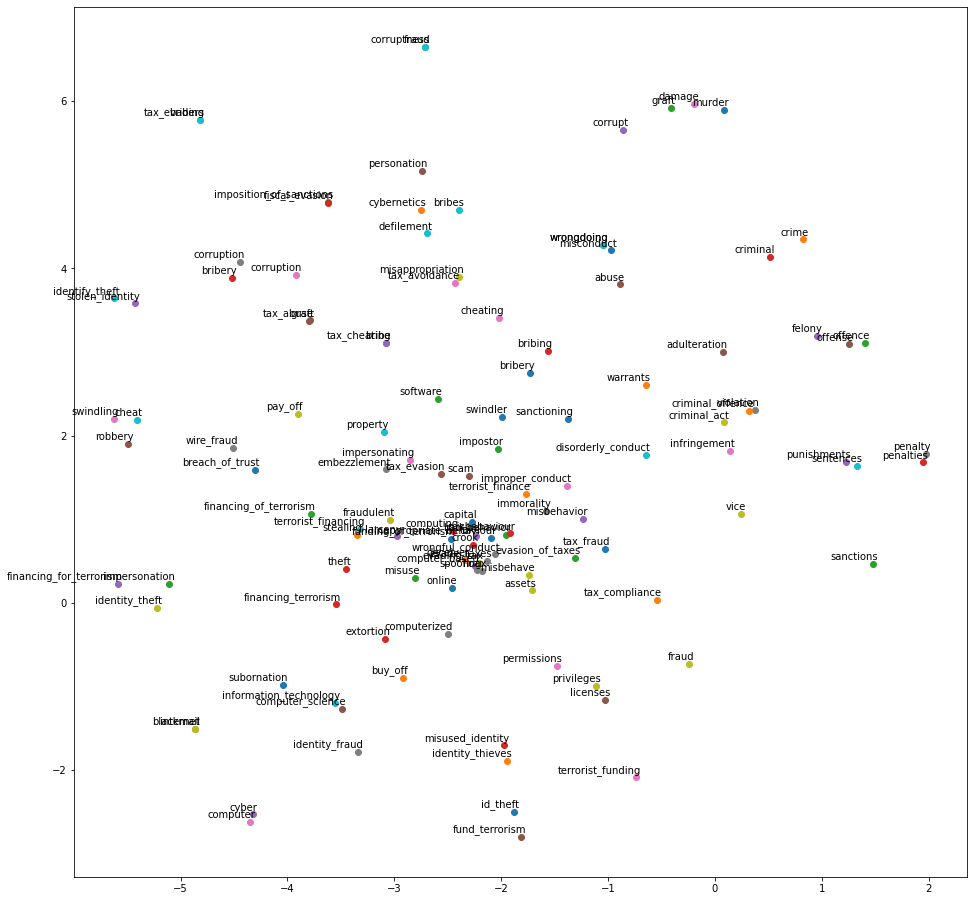

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Model Details : 
	Time taken for preprocessing : 1445.7416334152222 seconds 
	Time taken for training : 1285.000947713852 seconds


Evaluation : 
	 average similarity : 0.5753986757991879 


In [0]:
w2v = gen_model(14,30,5)

In [0]:
score(w2v,ground)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.5753986757991879

## Saving model

In [0]:
w2v.save("/content/drive/My Drive/Intern_2/word2vec.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
w2v.wv.save_word2vec_format("/content/drive/My Drive/Intern_2/trained.bin", fvocab=None, binary=True, total_vec=None)

## Evaluating Model

In [0]:
## Evaluation here

# Playing Around with word2vec

In [0]:
! python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4MB 1.3MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp36-none-any.whl size=98051305 sha256=254aa23aef00ef087f175f2e1a5a420e2fb63229cda3488492e1c895b1338247
  Stored in directory: /tmp/pip-ephem-wheel-cache-15xdv3oj/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [0]:
from collections import OrderedDict
import numpy as np
import en_core_web_md
from spacy.lang.en.stop_words import STOP_WORDS

nlp = en_core_web_md.load()

class TextRank4Keyword():
    """Extract keywords from text"""
    
    def __init__(self):
        self.d = 0.85 # damping coefficient, usually is .85
        self.min_diff = 1e-5 # convergence threshold
        self.steps = 10 # iteration steps
        self.node_weight = None # save keywords and its weight

    
    def set_stopwords(self, stopwords):  
        """Set stop words"""
        for word in STOP_WORDS.union(set(stopwords)):
            lexeme = nlp.vocab[word]
            lexeme.is_stop = True
    
    def sentence_segment(self, doc, candidate_pos, lower):
        """Store those words only in cadidate_pos"""
        sentences = []
        for sent in doc.sents:
            selected_words = []
            for token in sent:
                # Store words only with cadidate POS tag
                if token.pos_ in candidate_pos and token.is_stop is False:
                    if lower is True:
                        selected_words.append(token.lemma_.lower())
                    else:
                        selected_words.append(token.lemma_)
            sentences.append(selected_words)
        return sentences
        
    def get_vocab(self, sentences):
        """Get all tokens"""
        vocab = OrderedDict()
        i = 0
        for sentence in sentences:
            for word in sentence:
                if word not in vocab:
                    vocab[word] = i
                    i += 1
        return vocab
    
    def get_token_pairs(self, window_size, sentences):
        """Build token_pairs from windows in sentences"""
        token_pairs = list()
        for sentence in sentences:
            for i, word in enumerate(sentence):
                for j in range(i+1, i+window_size):
                    if j >= len(sentence):
                        break
                    pair = (word, sentence[j])
                    if pair not in token_pairs:
                        token_pairs.append(pair)
        return token_pairs
        
    def symmetrize(self, a):
        return a + a.T - np.diag(a.diagonal())
    
    def get_matrix(self, vocab, token_pairs):
        """Get normalized matrix"""
        # Build matrix
        vocab_size = len(vocab)
        g = np.zeros((vocab_size, vocab_size), dtype='float')
        for word1, word2 in token_pairs:
            i, j = vocab[word1], vocab[word2]
            g[i][j] = 1
            
        # Get Symmeric matrix
        g = self.symmetrize(g)
        
        # Normalize matrix by column
        norm = np.sum(g, axis=0)
        g_norm = np.divide(g, norm, where=norm!=0) # this is ignore the 0 element in norm
        
        return g_norm

    
    def get_keywords(self, number=10):
        """Print top number keywords"""
        node_weight = OrderedDict(sorted(self.node_weight.items(), key=lambda t: t[1], reverse=True))
        for i, (key, value) in enumerate(node_weight.items()):
            # print(key + ' - ' + str(value))
            yield((key,value))
            if i > number:
                break
        
        
    def analyze(self, text, 
                candidate_pos=['NOUN', 'PROPN'], 
                window_size=4, lower=False, stopwords=list()):
        """Main function to analyze text"""
        
        # Set stop words
        self.set_stopwords(stopwords)
        
        # Pare text by spaCy
        doc = nlp(text)
        
        # Filter sentences
        sentences = self.sentence_segment(doc, candidate_pos, lower) # list of list of words
        
        # Build vocabulary
        vocab = self.get_vocab(sentences)
        
        # Get token_pairs from windows
        token_pairs = self.get_token_pairs(window_size, sentences)
        
        # Get normalized matrix
        g = self.get_matrix(vocab, token_pairs)
        
        # Initionlization for weight(pagerank value)
        pr = np.array([1] * len(vocab))
        
        # Iteration
        previous_pr = 0
        for epoch in range(self.steps):
            pr = (1-self.d) + self.d * np.dot(g, pr)
            if abs(previous_pr - sum(pr))  < self.min_diff:
                break
            else:
                previous_pr = sum(pr)

        # Get weight for each node
        node_weight = dict()
        for word, index in vocab.items():
            node_weight[word] = pr[index]
        
        self.node_weight = node_weight

In [0]:
from gensim.test.utils import datapath
from gensim.models import Word2Vec, KeyedVectors
from time import time

model = Word2Vec.load('/content/drive/My Drive/Intern_2/word2vec.model')

In [0]:
len(model.wv.vocab)

1095165

In [0]:
score(model,ground)

0.5753986757991879

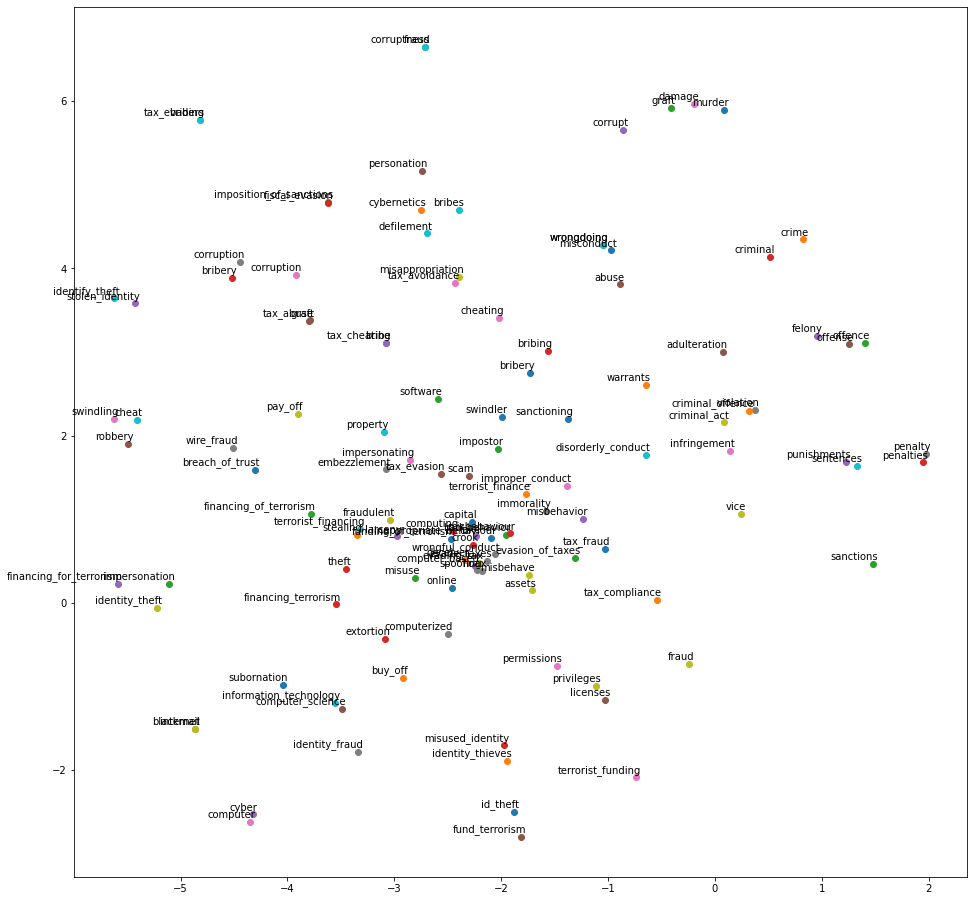

In [0]:
plot_eval(model,ground)

In [0]:
import pandas as pd
from tqdm import tqdm
results = pd.read_csv('/content/drive/My Drive/Intern_2/DBdata.csv')

In [0]:
tr4w = TextRank4Keyword()

In [0]:
for text in results['content'][:5]:
  tr4w.analyze(text, candidate_pos = ['NOUN', 'VERB'], window_size=5, lower=False)
  print(text)
  print()
  for x in tr4w.get_keywords(20):
    print(x)
  print()
  print()

Published on 7 Nov 2019
Facebook Offensive Security Engineer Amanda Rousseau aka "Malware Unicorn" uses the power of Twitter to answer common questions about hacking. As an offensive security engineer, Amanda has seen just about everything when it comes computer hacking. What exactly is the difference between a black hat and a white hat hacker? Is there such thing as a red hat hacker? What's the point of malware, is it just to be annoying? Are people who start DDoS attacks actually hackers? Amanda answers all these Twitter questions, and much more!
Amanda is an Offensive Security Engineer on the Red Team at Facebook and previously worked as a Malware Researcher at Endgame, FireEye, and the U.S. Department of Defense Cyber Crime Center. Follow her on Twitter at: https://malwareunicorn.org/#/about
Still haven’t subscribed to WIRED on YouTube? ►► http://wrd.cm/15fP7B7
Get more incredible stories on science and tech with our daily newsletter: https://wrd.cm/DailyYT
Also, check out the free

In [0]:
def normalize(array):
  a = max(array)
  b = min(array)
  new_array = [((x-b)/(a-b)) for x in array]
  return new_array

In [0]:
keywords = ['embezzlement',
 'assets',
 'crime',
 'fraud',
 'misconduct',
 'tax_evasion',
 'money_laundering',
 'identity_theft',
 'corruption',
 'sanctions',
 'cyber',
 'terrorism',
 'bribery']

In [0]:
def get_relevancy_score(text):
  tr4w.analyze(text, candidate_pos = ['NOUN', 'VERB'], window_size=5, lower=False)
  words = [x for x,y in tr4w.get_keywords(20)]
  _scores = normalize([y for x,y in tr4w.get_keywords(20)]) 
  scores = []
  labels = []
  for keyword in keywords:
    total = []
    for w,s in zip(words,_scores):
      if s > 0.25:
        try:
          sim = model.wv.n_similarity([w],[keyword])
          val = s*1 + sim*9
          total.append(val/10)
        except:
          pass
    try:
      result = max(total)
      labels.append(keyword)
      scores.append(result)
    except:
      pass
  n_scores = normalize(scores)
  results = []
  print()
  for l,s,n in zip(labels,scores,n_scores):
    if n > 0.7:
      results.append({"keyword" : l , "score" : s})
  return results

In [0]:
print(results['content'][0])

Published on 7 Nov 2019
Facebook Offensive Security Engineer Amanda Rousseau aka "Malware Unicorn" uses the power of Twitter to answer common questions about hacking. As an offensive security engineer, Amanda has seen just about everything when it comes computer hacking. What exactly is the difference between a black hat and a white hat hacker? Is there such thing as a red hat hacker? What's the point of malware, is it just to be annoying? Are people who start DDoS attacks actually hackers? Amanda answers all these Twitter questions, and much more!
Amanda is an Offensive Security Engineer on the Red Team at Facebook and previously worked as a Malware Researcher at Endgame, FireEye, and the U.S. Department of Defense Cyber Crime Center. Follow her on Twitter at: https://malwareunicorn.org/#/about
Still haven’t subscribed to WIRED on YouTube? ►► http://wrd.cm/15fP7B7
Get more incredible stories on science and tech with our daily newsletter: https://wrd.cm/DailyYT
Also, check out the free

In [0]:
get_relevancy_score(results['content'][0])

[{'keyword': 'identity_theft', 'score': 0.5423153368656782},
 {'keyword': 'cyber', 'score': 0.6304629699299074}]

In [0]:
model.wv.save_word2vec_format("/content/drive/My Drive/Intern_2/trained.bin", fvocab=None, binary=True, total_vec=None)

### Storing models in s3

In [0]:
ACCESS_ID = ''
ACCESS_KEY = ''

In [0]:
import boto3
s3 = boto3.resource('s3',
         aws_access_key_id=ACCESS_ID,
         aws_secret_access_key= ACCESS_KEY
         )

import botocore
bucket = s3.Bucket('sams-models')
exists = True
try:
    s3.meta.client.head_bucket(Bucket='sams-models')
except botocore.exceptions.ClientError as e:
    # If a client error is thrown, then check that it was a 404 error.
    # If it was a 404 error, then the bucket does not exist.
    error_code = e.response['Error']['Code']
    if error_code == '404':
        exists = False

In [0]:
exists

True

In [0]:
s3.Object('sams-models', 'word2vec.bin').put(Body=open('/content/drive/My Drive/Intern_2/trained.bin', 'rb'))

{'ETag': '"ee6d3bb521ba2509df0e14ae75cfebb4"',
 'ResponseMetadata': {'HTTPHeaders': {'content-length': '0',
   'date': 'Mon, 15 Jun 2020 07:17:02 GMT',
   'etag': '"ee6d3bb521ba2509df0e14ae75cfebb4"',
   'server': 'AmazonS3',
   'x-amz-id-2': 'sd3kx5eZNGhwLOMWSY/2tiQlfbCcKtXfmfCsXSUqOxMIrAwq3zIsTZmXijMpLRGvXyQQeaUstp4=',
   'x-amz-request-id': 'DB3B6B99B65017CD'},
  'HTTPStatusCode': 200,
  'HostId': 'sd3kx5eZNGhwLOMWSY/2tiQlfbCcKtXfmfCsXSUqOxMIrAwq3zIsTZmXijMpLRGvXyQQeaUstp4=',
  'RequestId': 'DB3B6B99B65017CD',
  'RetryAttempts': 0}}

In [0]:
bucket = s3.Bucket('sams-images')
for key in bucket.objects.all():
  print(key.key)

In [0]:
url = 's3://' + ACCESS_ID + ":" + ACCESS_KEY + "@sams-models/word2vec.bin"
wv = KeyedVectors.load_word2vec_format(url , binary=True)